In [ ]:
import matplotlib.pyplot as plt
import pickle

slurm-20141.out


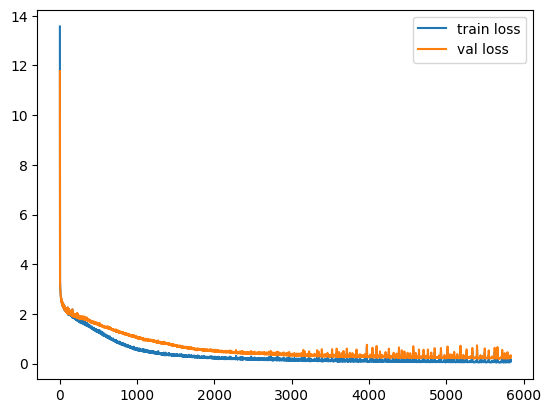

slurm-20139.out


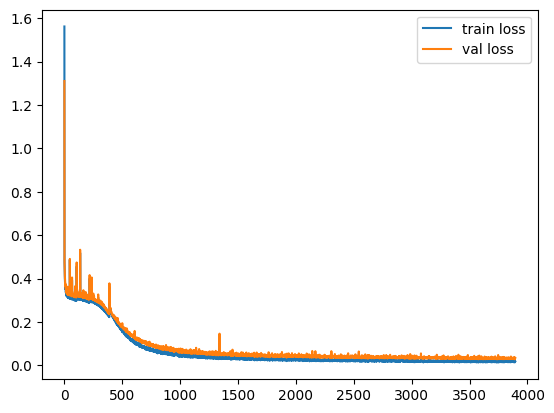

In [7]:
import matplotlib.pyplot as plt

slurm_files = [
    'slurm-20141.out',
    'slurm-20139.out',
]


for slurm_file in slurm_files:

    # break
    
    print(slurm_file)
    with open(slurm_file, 'r') as f:
        lines = f.readlines()
        # print(len(lines))

        
        train_losses = []
        val_losses = []
        for line in lines:
            
            if 'train loss' in line:
                # print(line)
                train_loss = line.split()[-4]
                train_loss = train_loss[:-1]
                val_loss = line.split()[-1]
                # print(train_loss, val_loss)
                train_losses.append(float(train_loss))
                val_losses.append(float(val_loss))

            

    plt.plot(train_losses[:9000], label='train loss')
    plt.plot(val_losses[:9000], label='val loss')
    plt.legend()
    plt.show()


In [1]:
import pickle
import numpy as np

m = float('inf')
total = 0
for i in range(10):
    
    try:
        with open('3d/{}/dataset.pkl'.format(i), 'rb') as f:
            dataset = pickle.load(f)
            # print(dataset[-1])

        dataset = np.array(dataset)
        # print(dataset[0:10])
        # print(i)
        print(dataset.shape)

        m = min(m, dataset.shape[0])
        total += dataset.shape[0]
    except:
        pass

        

    # break


print(m)
print(total)

(12859, 10)
(12810, 10)
(12987, 10)
(15153, 10)
(11336, 10)
(18948, 10)
(10417, 10)
(8810, 10)
(11962, 10)
(12861, 10)
8810
128143


In [ ]:
for i in range(0,10):

    temp = pickle.load(open('envs/2d/env'+str(i)+'.pkl', 'rb'))
    
    temp = np.array(temp)
    
    print(temp.shape)
    print(temp)
    temp = temp.flatten()
    print(temp.shape)
    print(temp)

    break

In [ ]:

with open('envs/2d/env0_pc.pkl', 'rb') as f:
    env = pickle.load(f)

env = np.array(env)
print(env.shape)

with open('2d/0/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)



dataset = np.array(dataset)
print(dataset.shape)


# group by start and goal
start = dataset[:,0:2]
goal = dataset[:,2:4]

# make a list of points with same start and goal
# for each point, find the min cost

points = {}

for i in range(dataset.shape[0]):
    s = tuple(start[i])
    g = tuple(goal[i])

    if (s,g) not in points:
        points[(s,g)] = []

    points[(s,g)].append(dataset[i,4:6])



for i, key in enumerate(points):
    points[key] = np.array(points[key])

    # print lines connecting the points
    pts = points[key]
    for j in range(1, pts.shape[0]):
        plt.plot([pts[j-1,0], pts[j,0]], [pts[j-1,1], pts[j,1]], 'r')


    if i == 10000:
        break



# x = dataset[:,0]
# y = dataset[:,1]

# plt.scatter(x, y)

# plot points
plt.scatter(env[:,0], env[:,1])
plt.show()


In [ ]:
import pandas as pd
args_list = []
import os

root_files = os.listdir()

print(root_files)

# root_files = ['slurm-19461.out']

for file in root_files:
    if 'slurm' not in file:
        continue


    with open(file, 'r') as f:
        # read first line
        line = f.readline()[10:-2]
        t = f.readline()
        if 'timestamp' not in t:

            continue
            
        # print(t)
        # print(t.split(':'))
        timestamp = t.split(':')[-1].strip()
        # print(timestamp)
    
        # print(timestamp)
        # print(line)

        # extract the arguments
        # split by , and =
        args = line.split(',')
        args = [arg.split('=') for arg in args]
        args = [(arg[0].strip(), arg[1].strip()) for arg in args]
        # remove quotes if present
        args = [(arg[0], arg[1][1:-1]) if arg[1][0] == "'" else arg for arg in args]
        
        args = dict(args)
        args['timestamp'] = timestamp
        # print(args)

        # append dictionary values to args_list
        args_list.append(list(args.values()))
        

print(args_list)
# save to csv
df = pd.DataFrame(args_list, columns=list(args.keys()))
df.to_csv('experiments.csv', index=False)




In [ ]:
import pickle
import numpy as np

m = float('inf')
total = 0
for i in range(10):
    with open('3d/{}/dataset.pkl'.format(i), 'rb') as f:
        dataset = pickle.load(f)

    dataset = np.array(dataset)
    print(dataset.shape)

    m = min(m, dataset.shape[0])
    total += dataset.shape[0]


print(m)
print(total)

In [ ]:
# import 3d point cloud
with open('envs/3d/env0_pc.pkl', 'rb') as f:
    env = pickle.load(f)

env = np.array(env)
print(env.shape)
